```
i just casually see Pandas (Panel_Data) as SQL/Excel/R version of Python 
There are 3 basics Entities include in pandas
1. Series
2. DataFrame
3. Panel

We will explore Series & DataFrame in Beginer level & will explore panel in advance level
```

```
list                             - Heteroginious (slow) + Implicite labels
Array     (Manipulate by Numpy)  - Homoginious + Implicite labels
Dictionay                        - Heteroginious + Explicite labels
Series    (Manipulate by Pandas) - 1D -> Heteroginious + Explicite labels(Index, Column) + Implicite labels
Dataframe (Manipulate by Pandas) - 2D -> Heteroginious + Explicite lables(Index, Column) + Implicite Labels
```

In [1]:
import warnings;warnings.filterwarnings('ignore')
import os,sys,joblib
from datetime import date,time,datetime,timedelta
from tqdm import tqdm; tqdm.pandas()
import numpy as np,pandas as pd   #     <--- Here is our Hero , pandas (nickname: pd)
len(dir(pd))                      # 141 <--- No of method available in pandas

141

In [5]:
# Set up Display Options in pandas (Optional at beginer level)
pd.set_option('display.max_rows',30,         # No of rows to Display
              'display.max_columns',None,    # No of Columns to Display
              "display.precision", 8)        # Precision of Numeric Data in dataframe

<div style="text-align: center;">
    <h1><span style='color:red'>Series ("Heteroginious" 1D list having "labels" to acces it)</span> </u> </h1>
</div>

In [4]:
# Creatting Series
pd.Series([10,20,30])                    # data
pd.Series([10,20,30.0],['a','b','c'])    # data, labels
pd.Series({'a':10,'b':20,'c':'axc'})     # dictionary

a     10
b     20
c    axc
dtype: object

In [5]:
# note difference between print and display
ser1=pd.Series([1,2,3,4],['USA','Germany','USSR','Japan'])
ser2=pd.Series([1,2,3,4],['USA','Germany','Italy','Japan'])

display(ser1);display(ser2)

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

USA        1
Germany    2
Italy      3
Japan      4
dtype: int64

In [6]:
ser1+ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

```





```

<div style="text-align: center;">
    <h1><span style='color:red'>DataFrame ("Heteroginious" 2D list having "labels" to acces it)</span> </u> </h1>
</div>

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 1: Creating & Loading Dataframe</span> </u> </h1>
</div>

```
★★★★☆
            Explicite Lables                                            Implicite Lables
            
- Displayed                                                   - Invisible / Imaginary Indices
- Could have any datatype: int/float/object                   - range(0,len(row/column))
- Indices could be repeated but not recomended                - Indices are unique lies 1 step apart from previous one
- can be use for assigning new row and updating exsiting row  - can be use only for updating exsiting row
- Mostly use in industry                                      - Not mostly use in industry
- operated by loc[]                                           - operated by iloc[]
```

<div style="text-align: center;">
    <h2>Creating DataFrame</u> </h2>
</div>

#### 1. 2D-List (Row Oriented Approach)

```
- Creating dataframe with no explicit index & column so implicit indices are assigned as explicite 
- So if you are NOT defining explicit indices seperatly, in that case explicite and implicite indices are same i.e 
  row Index     [Index] : range(0,len(row))
  column Index [Columns]: range(0,len(column))
```

In [2]:
data_list = [['Alice', 25, 'New York'],
             ['Bob', 30, 'San Francisco'],
             ['Charlie', 22, 'Los Angeles']]

pd.DataFrame(data_list)                                                                                     

,0,1,2
0,Alice,25,New York
1,Bob,30,San Francisco
2,Charlie,22,Los Angeles


#### 2. 2D-Tuple (Row Oriented Approach)

```
I wanted to make you undestand:
- Initialising Explicit columns & index both
- Note : there could be missing value in row oriented approach which is not the case with columns oriented approach
```

In [16]:
# Method 1 of initializing explicite index & columns
data_tuple = (('Alice', 25, 'New York'),
              ('Bob', 30, 'San Francisco'),
              ('Charlie',12,'Sillicon Vallay'))

pd.DataFrame(data_tuple,
             index=['a','b','c'],             #<--
             columns=['Name', 'Age', 'City']) #<--

,Name,Age,City
a,Alice,25,New York
b,Bob,30,San Francisco
c,Charlie,12,Sillicon Vallay


In [17]:
# Method 2 of initializing explicite index & columns
data_tuple = (('Alice', 25, 'New York'),
              ('Bob', 30, 'San Francisco'),
              ('Charlie',22))                          # Missing Value in Row oriented approach will be replace with None

df=pd.DataFrame(data_tuple)
df.index=['A','B','C']
df.columns=['Name', 'Age', 'City']
df

,Name,Age,City
A,Alice,25,New York
B,Bob,30,San Francisco
C,Charlie,22,None


#### 3. 2D-Array 

In [7]:
pd.DataFrame(np.random.randint(1,50,20).reshape(5,4),
             index='A B C D E'.split(),
             columns='W X Y Z'.split())

,W,X,Y,Z
A,37,37,37,38
B,34,26,45,11
C,29,36,28,21
D,33,6,3,7
E,46,11,46,12


#### 4. Dictionary (Column Oriented Approach)

```
- Initialising Explicit columns only not indexses,Hence Implicite Index assigned as Explicite Index 
- Missing value in column oriented approach in prohabited
```

In [19]:
data_dict = { 'Name': ['Alice', 'Bob', 'Charlie'],
              'Age': [25, None, 22],
              'City': ['New York', 'San Francisco', None]}

pd.DataFrame(data_dict)

# Note the diff between "None"(catagorical null) and "NaN"(numeric null/ Not a Number) in output

,Name,Age,City
0,Alice,25.0,New York
1,Bob,NaN,San Francisco
2,Charlie,22.0,None


```
★★★★★
                 None                                NaN (Not any Number)                 NaT(Not a Time)    
                [None]                                 [np.NaN / np.nan]                     [pd.NaT]
-------------------------------------------------------------------------------------------------------------------
- Empty                                            - it is the garbage float value      - it is the garbage datetime    
- Respresent Absense of Value in Non-Number column - Respresent Absense of Value in     - Represent Absense of datetime 
                                                     Number column                        value in column
- type(None) --> None   : has its own datatype     - type(NaN) --> Float                - type(NaT) : NaTType 
- Any Operation on None is error                   - Any Operation on Nan is Nan
- None gets autocasted ot Nan in case of strictly  - Nan does not get autocasted to None
  Numeric column because Nan preseves some           in case of String Columns
  numerical properties

Note:in pandas both NaN and None values are Treated same as Null Values (na_values)
you can include your own specifide Null value while uploading the data


GPT Query to try:
    What are the default na_values pandas cosider in Python?
```

In [34]:
print(pd.Series([1,np.nan,4,None]))     # --> None Converted into Nan in case of Numeric Column
print(pd.Series([1,np.nan,'4',None]))   # --> Nan Remains Nan in case of Non Numeric Column

0    1.0
1    NaN
2    4.0
3    NaN
dtype: float64
0       1
1     NaN
2       4
3    None
dtype: object


<div style="text-align: center;">
    <h2>Uploading Dataframe</u> </h2>
</div>

```
Witty Tip ☺ : copy file location directory by Ctrl + Shift + C in WIN 11 and onwards
```

In [35]:
# Text File ; sep='\t'
df=pd.read_table(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\Airbnbnps.txt",
                 na_values=['??','##'],    # Defining custom na values
                 encoding='utf 8')   

 # Text File ; sep=' '
df=pd.read_table(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\Airbnbnps.txt",
                 sep=' ')                 

# csv file  ; sep=','
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")                      
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/715/original/sales_dataset.csv?1651726697')

# Json File
df=pd.read_json(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\iris.json")                               

# Excel File
df=pd.read_excel(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\Historicalinvesttemp.xlsx",
                 sheet_name='Sheet1') 

# encoders='utf 8', 
#          'latin-1'

In [8]:
# na_values will replace junk data into NaN or None or NaT including blank which is default
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv",
               na_values=['??','##'])

# Note : Giving a name to Indexes and columns , Observe how it get reflected in output
df.index.names=['indx']
df.columns.names=['attributes']
df.head(2)

attributes,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
indx,,,,,,,,,,,
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17


```




















```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 2: Setting & Resetting Explicit Index  & Columns </span> </u> </h1>
</div>

- NOTE: We can't change implisit indices which is by default created by pandas

In [55]:
df = pd.DataFrame({'A': [1, 1,2,2, 3], 
                   'B': [4, 5, 6,11,12],
                   'C': [7,8,9,32,25]})
df

,A,B,C
0,1,4,7
1,1,5,8
2,2,6,9
3,2,11,32
4,3,12,25


<div style="text-align: center;">
    <h2>Changing Explicite Columns</u> </h2>
</div>

In [56]:
# Method 1
# df.rename()  ---> Renaming Explicite columns names in dataframe
df.rename(columns={'A': 'NewA', 
                   'C': 'NewC'}, 
          inplace=False)

,NewA,B,NewC
0,1,4,7
1,1,5,8
2,2,6,9
3,2,11,32
4,3,12,25


In [57]:
# Method 2
df.columns=['abba','tabba','jabba']
df

,abba,tabba,jabba
0,1,4,7
1,1,5,8
2,2,6,9
3,2,11,32
4,3,12,25


###### Playing with Columns

In [6]:
# Lets say we have following dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv",
               na_values=['??','##'])
df.sample(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
194,195,rDqQCTu,26,rDqQCTu@mail.com,F,mumbai,SPL50,1927,7.8,42,9
5,6,dltqrQC,25,dltqrQC@infostats.in,F,delhi,SZ255,1226,3.1,73,11
113,114,FxWOIyo,79,FxWOIyo@crs.co.in,F,bangalore,SZ255,2976,8.5,73,17


In [15]:
# selecting perticular columns or index in dataframe base on substring (regex finding)
df.filter(like='1',axis=0).head()   # row-wise filtered DataFrame
df.filter(like='1',axis=0).index    # Index Names

df.filter(like='cust').head()      # columns wise filtered DataFrame
df.filter(like='cust').columns     # Columns Names ['custid', 'cust_since'] ★★★☆☆ 
                                   # most of the time you will encounter a situation with large no of columns and 
                                   # want to get columns name base on substring you know

Index(['custid', 'cust_since'], dtype='object')

In [14]:
# sorted columns
df.sort_index(axis=1,ascending=False) | df[sorted(df.columns)] | df.reindex(columns = sorted(df.columns))

,talktime,plan,netuse,name,gender,email,custid,cust_since,compl,city,age
0,2591,SZ255,5.5,ZkYesFK,F,ZkYesFK@imarticus.com,1,28,2,chennai,38
1,3448,WKD500,3.7,WlFqRhG,F,WlFqRhG@gmail.com,2,30,17,kolkata,21


In [20]:
# Adding suffixes and prefixes in columns names
display(df.add_suffix('_suf').head(2))
display(df.add_prefix('pre_').head(2))

,custid_suf,name_suf,age_suf,email_suf,gender_suf,city_suf,plan_suf,talktime_suf,netuse_suf,cust_since_suf,compl_suf
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17


,pre_custid,pre_name,pre_age,pre_email,pre_gender,pre_city,pre_plan,pre_talktime,pre_netuse,pre_cust_since,pre_compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17


<div style="text-align: center;">
    <h2>Changing Explicite Index</u> </h2>
</div>

In [42]:
# Method 1
df.rename(index={0: 100, 4: 104}, 
          inplace=False)

,abba,tabba,jabba
100,1,4,7
1,1,5,8
2,2,6,9
3,2,11,32
104,3,12,25


#### Creating and assigning Explicite Index

In [54]:
# Method 2
df.index = list(range(5,len(df)+5))
df.index=df.index.astype(float)      # OR df.index.map(float)  Note: map is relatively slower than astype, but provide more flexibility
df

,abba,jabba
5.0,1,7
6.0,1,8
7.0,2,9
8.0,2,32
9.0,3,25


In [52]:
# Method 3
df.index = np.array(np.arange(5,len(df)+5),
                    dtype=float)               # Explicite Indices can have any datatype(float in this case)
df

,abba,jabba
5.0,1,7
6.0,1,8
7.0,2,9
8.0,2,32
9.0,3,25


#### Assigning Table column as Explicite Index

In [59]:
df

,abba,tabba,jabba
tabba,,,
4,1,4,7
5,1,5,8
6,2,6,9
11,2,11,32
12,3,12,25


In [62]:
# set_index # (drop default)
df.set_index('tabba',inplace=True,drop=False)  |  df.index=df.abba        # custid as index; also in column
df.set_index('tabba',inplace=True)                                        # custid as index; not as column

# reset_index (Flattening of groupby datframe)
df.reset_index(inplace=True,drop=True) | df.index=range(len(df)) #setting up an new index & deleteing current index column
df.reset_index(inplace=True)                                     # setting up an new index & making current index as column 

In [63]:
# "Multi-Level_Index" :Setting up multiple column as index known as 
display(df)
df.set_index(['abba','jabba'])

,index,abba,jabba
0,0,1,7
1,1,1,8
2,2,2,9
3,3,2,32
4,4,3,25


index
abba jabba       
1    7          0
     8          1
2    9          2
     32         3
3    25         4

```































```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 3: Reshaping datafrmae </span> </u> </h1>
</div>


```
Melt
pivot
pivot_table
explode
json_normalize
crosstab
```

```
GPT Question to explore : 
    What is the difference between pivot and pivot_table in pandas?
```

In [90]:
# Lets Say we have following dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv",
               na_values=['??','##'])
df.sample(5)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
174,175,WIvacyq,28,WIvacyq@yahoo.co.in,M,mumbai,SZ255,2359,4.5,58,17
280,281,ftohAJD,46,ftohAJD@gmail.com,M,delhi,STUD100,3552,4.6,33,10
50,51,YecPXiI,89,YecPXiI@hotmail.com,F,thane,STUD100,1632,3.4,107,3
167,168,AWRmuCF,24,AWRmuCF@gmail.com,F,bangalore,SZ255,3077,4.5,82,16
117,118,POYsRiC,76,POYsRiC@mail.com,M,pune,STUD100,1341,3.0,56,5


<div style="text-align: center;">
    <h2>Melt (Converting Column level data into row level data)</u> </h2>
</div>

```
- Feature in original table act as catagories in catagorical column in melt talble 
- it always added 2 column extra with id_vars columns which is Attributes and Atrributs_Values 
- if there were n rows before and m columns were melted [value_vars] into category feature, we will have n*m rows
  afterwards ?
```

In [91]:
# Unpivoting / Melting Data
dfm=pd.melt(df,
            id_vars=['custid','city','gender'],
            value_vars=['compl','cust_since'],
            var_name='Attributes',
            value_name='Attributes_Value')
dfm.sample(5)

,custid,city,gender,Attributes,Attributes_Value
109,110,trivandrum,M,compl,12
101,102,thane,F,compl,14
241,242,trivandrum,F,compl,11
296,297,mumbai,F,compl,19
259,260,chennai,F,compl,19


<div style="text-align: center;">
    <h2>Pivote (Converting Row level data into Column level data)</u> </h2>
</div>

In [92]:
dfm.head(3)

,custid,city,gender,Attributes,Attributes_Value
0,1,chennai,F,compl,2
1,2,kolkata,F,compl,17
2,3,chennai,F,compl,18


In [93]:
# Pivoting Data (Back to original Dataframe)
dfp=dfm.pivot(index=['custid','city','gender'],
              columns='Attributes',
              values='Attributes_Value').reset_index()
dfp.columns.name=None
dfp

,custid,city,gender,compl,cust_since
0,1,chennai,F,2,28
1,2,kolkata,F,17,30
2,3,chennai,F,18,100
3,4,trivandrum,M,10,63
4,5,thane,F,15,22
5,6,delhi,F,11,73
6,7,pune,F,10,103
7,8,bangalore,M,10,13
8,9,mumbai,F,10,66
9,10,thane,M,3,89


★★★★☆
<div style="text-align: center;">
    <h2>Explode</u> </h2>
</div>

In [94]:
df = pd.DataFrame( {'ID': [1, 2, 3],
                    'Items': [['A', 'B'], ['C', 'D', 'E'], ['F']]})
display(df)
df.explode('Items',ignore_index=True)

,ID,Items
0,1,"[A, B]"
1,2,"[C, D, E]"
2,3,[F]


,ID,Items
0,1,A
1,1,B
2,2,C
3,2,D
4,2,E
5,3,F


★★★★☆
<div style="text-align: center;">
    <h2>json_normalize</u> </h2>
</div>

```
json-normalize is used specially when , you are fetching data from NO-SQL table like MongoDB
```

In [137]:
import json
# Lets say we have dataframe 
# don't think how df gets created thats not the purpose here,cosider we have a df in following format
data = {
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'info': [
        '{"age": 25, "city": "New York"}',
        '{"age": 30, "city": "San Francisco"}',
        '{"age": 35, "city": "Los Angeles","gender":"Male"}'
    ]
}

df = pd.DataFrame(data)
df['info'] = df['info'].apply(json.loads)
df

,id,name,info
0,1,Alice,"{'age': 25, 'city': 'New York'}"
1,2,Bob,"{'age': 30, 'city': 'San Francisco'}"
2,3,Charlie,"{'age': 35, 'city': 'Los Angeles', 'gender': '..."


In [136]:
# we can normalize any column containing dict as element in following manner
pd.json_normalize(df['info'])

,age,city,gender
0,25,New York,NaN
1,30,San Francisco,NaN
2,35,Los Angeles,Male


```




















```

```




















```

```




















```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 4:  Dataframe Attributes </span> </u> </h1>
</div>


In [43]:
# Lets say we have a dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


<div style="text-align: center;">
    <h3>Shape & Size</u> </h3>
</div>

In [36]:
df.size                                          # 3300      :total datapoints
df.shape                                         # (300, 11) :shape
df.shape[0]   | len(df.index)  | len(df)         # 300       :no of rows
df.shape[1]   | len(df.columns)                  # 11        :no of column 
df.empty  |  df.shape[0] == 0  |  len(df) == 0   # True / False   ★★★★☆                        

11

<div style="text-align: center;">
    <h3> Column Names</u> </h3>
</div>

In [37]:
df.columns.names
df.columns                                                             # datype = Index
df.columns.values                                                      # Array of Columns

list(df.columns).index('age') or list(df.columns.values).index('age')  # getting Implicite lable using Explicite
df.columns[2]                 or df.columns.values[2]                  # getting Explicite lable using Implicite lable

'age'

<div style="text-align: center;">
    <h3>Row Names </u> </h3>
</div>

In [139]:
# Lets say we have a dataframe
df=pd.DataFrame(np.random.randint(1,50,20).reshape(5,4),
                index='A B C D E'.split(),
                columns='W X Y Z'.split())
df

,W,X,Y,Z
A,30,4,45,23
B,7,2,13,48
C,33,39,34,18
D,5,41,31,29
E,8,1,13,47


In [39]:
df.index.names                                   # column name of explicite index
df.index                                         # dtype = index  | RangeIndex(start=0, stop=5, step=1)
df.index.values                                  # Array of index (row names)

df.index[1]           or    df.index.values[1]   # getting Explicite lable using Implicite
df.index.get_loc('A')                            # getting Implicite lable using Explicite

0

<div style="text-align: center;">
    <h3>dtype</u> </h3>
</div>

```
There are only 5 datatypes in dataframe(Heteroginious) 
1. int64
2. float64
3. catagory
4. datetime
5. object : anything other than above
```

In [40]:
df.dtypes                                                           # datatype info
df.dtypes.value_counts()
df.convert_dtypes()                                                 # Convert DataFrame to best possible dtypes.
df.W.astype('category')   | df.W.astype('float')  | df.W.map(float) # Typecasting perticular column to other datatype
                                                                    # Note: astype is more faster than map
df.select_dtypes([int,float])
pd.to_datetime(df['W'])                                             # Typecasting perticular column to datetime datatype

,W,X,Y,Z
A,47,27,2,10
B,17,3,32,26
C,24,12,15,30
D,19,3,10,3
E,35,38,16,9


```




















```

```




















```

```




















```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 5: Dataframe Methods </span> </u> </h1>
</div>


In [140]:
# Lets say we have a dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


In [51]:
df.T                        # Transpose
dfc=df.copy()               # Creatng df Copy
df.memory_usage()           # Memory use by each column

# Heatmap
df.isnull()    |   df.isna() 
df.isna().sum()              # for columns
df.isna().sum(axis=1)        # for rows
df.corr()      |   df.cov()

,custid,age,talktime,netuse,cust_since,compl
custid,7525.000000,-8.921405,3.228426e+03,-10.065719,-75.662207,14.570234
age,-8.921405,432.432230,-1.562999e+03,-0.079800,5.300245,-2.984181
talktime,3228.426421,-1562.999052,1.110745e+06,-67.351878,-916.173690,124.991806
netuse,-10.065719,-0.079800,-6.735188e+01,6.476978,-5.485454,0.330759
cust_since,-75.662207,5.300245,-9.161737e+02,-5.485454,1161.682765,-11.253645
compl,14.570234,-2.984181,1.249918e+02,0.330759,-11.253645,32.056756


In [144]:
# get_dummies
display(df.gender.unique())
pd.get_dummies(df.gender,drop_first=False)

array(['F', 'M'], dtype=object)

,F,M
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


```




















```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 6: Understanding Data (Series + DataFrame) </span> </u> </h1>
</div>


In [52]:
# Lets say we have a dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


In [19]:
df.head(5)
df.tail(5)
df.sample(5)

df.info()                                                     # info about datatype(int,float,object) and Null values
# df.isna()      |   df.isna().sum()  | df.isna().sum().sum()

# describe ★★★★★
df.describe().T                                               # Stastical information about numeric data only
df.describe().T.style.background_gradient(cmap='RdPu')
df.describe(percentiles=[0.1,0.2,0.5,0.95]).T
df.describe(include=object).T                                 # Stastical information about Object data only
df.describe(include='all').T                                  # Stastical information about numeric & Object both

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   custid      300 non-null    int64  
 1   name        300 non-null    object 
 2   age         300 non-null    int64  
 3   email       300 non-null    object 
 4   gender      300 non-null    object 
 5   city        300 non-null    object 
 6   plan        300 non-null    object 
 7   talktime    300 non-null    int64  
 8   netuse      300 non-null    float64
 9   cust_since  300 non-null    int64  
 10  compl       300 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 25.9+ KB


,count,mean,std,min,25%,50%,75%,max
custid,300.0,150.500000,86.746758,1.0,75.75,150.5,225.25,300.0
age,300.0,52.576667,20.795005,18.0,34.00,51.5,70.00,89.0
talktime,300.0,1898.183333,1053.918868,33.0,1019.50,1962.0,2846.50,3598.0
netuse,300.0,5.565667,2.544991,1.0,3.30,5.7,7.80,10.0
cust_since,300.0,61.053333,34.083468,1.0,31.75,63.0,90.00,119.0
compl,300.0,9.990000,5.661869,0.0,5.00,10.0,15.00,19.0


,count,unique,top,freq
name,300,300,ZkYesFK,1
email,300,300,ZkYesFK@imarticus.com,1
gender,300,2,M,166
city,300,8,bangalore,46
plan,300,7,SPL50,57


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
custid,300.0,NaN,NaN,NaN,150.5,86.746758,1.0,75.75,150.5,225.25,300.0
name,300,300,ZkYesFK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,300.0,NaN,NaN,NaN,52.576667,20.795005,18.0,34.0,51.5,70.0,89.0
email,300,300,ZkYesFK@imarticus.com,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,300,2,M,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,300,8,bangalore,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan,300,7,SPL50,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
talktime,300.0,NaN,NaN,NaN,1898.183333,1053.918868,33.0,1019.5,1962.0,2846.5,3598.0
netuse,300.0,NaN,NaN,NaN,5.565667,2.544991,1.0,3.3,5.7,7.8,10.0
cust_since,300.0,NaN,NaN,NaN,61.053333,34.083468,1.0,31.75,63.0,90.0,119.0


In [20]:
display(  df.describe(percentiles=[0.1,0.2,0.5,0.95]).T  )
df.describe().T.style.background_gradient(cmap='RdPu')

,count,mean,std,min,10%,20%,50%,95%,max
custid,300.0,150.500000,86.746758,1.0,30.9,60.8,150.5,285.05,300.0
age,300.0,52.576667,20.795005,18.0,25.0,31.0,51.5,84.05,89.0
talktime,300.0,1898.183333,1053.918868,33.0,385.3,853.6,1962.0,3460.40,3598.0
netuse,300.0,5.565667,2.544991,1.0,2.0,3.0,5.7,9.40,10.0
cust_since,300.0,61.053333,34.083468,1.0,12.8,28.0,63.0,112.05,119.0
compl,300.0,9.990000,5.661869,0.0,2.0,4.0,10.0,19.00,19.0


```














```

```














```

```














```

```














```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 7: loc & iloc </span> </u> </h1>
</div>


loc & iloc use for accesing ROW's primiraly

```
★★★★☆
       loc[explicite_lables]                                     iloc[implicite_lables]
            
- use to access explicite_indices                           - use to access implicite_indices   
- loc[] has inclusive indexing                              - iloc[] hs exclusive indexing 5
        loc[0:5] --> R=0-5                                            iloc[0:5] --> R=0-4
- can be use for assigning and updating exsiting rows       - can be use only for updating exsiting rows
- Mostly use in industry                                    - Not mostly use in industry
```

In [4]:
# Lets say we have a dataframe
df=pd.DataFrame(np.random.randint(1,50,20).reshape(5,4),
                index='R1 R2 R3 R4 R5'.split(),
                columns='C1 C2 C3 C4'.split())
df

,C1,C2,C3,C4
R1,28,7,15,7
R2,17,11,42,23
R3,22,17,16,31
R4,33,31,26,20
R5,38,8,42,42


★★★★★ (Try individualy and Uderstand following carefully)

In [88]:
# ------------------------------------------Single Row | Single Column ----------------------------------------------
# C=C2
# Accesing Column as Column_Series
df.C2           # i usually prefer to use this methods, as it act like attribut to datafrmae,easy to think
                # but you need to make sure first, 1.columns names has no space(should_be_underscore_seperated) 
                #                                  2. columns names should not be any standard keyword 
df['C2']        # <--if you dont want to worry about above constraints go with this method, which most of data sci. does
df.loc[:,'C2']   
df.iloc[:,1]    
# Accesing Column as Dataframe
df[['C2']]                 
df.loc[:,['C2']]   
df.iloc[:,[1]] 
pd.DataFrame(df,columns=['C2'])

# R=R1
# Accesing Rows as Rows_Series
df.loc['R1']             
df.iloc[0]     
# Accesing Rows as Dataframe
df.loc[['R1']]          
df.iloc[[0]]        
pd.DataFrame(df,index=['R1'])

# Last Row | Last Column
# R=last Row
df.loc[-1]          # ERROR
df.iloc[-1]         # Row_Series                                

# C=last Column
df.loc[:,-1]        # ERROR
df.iloc[:,-1]       # Column_Series    


# ____________________________________________________DataFrames_____________________________________________________

# ..........................................Multiple Rows | Miltiple Column..........................................
# C=C1,C3,C4
df[['C1','C3','C4']]          
df.loc[:,['C1','C3','C4']]   
df.iloc[:,[0,2,3]] 
pd.DataFrame(df,columns=['C1','C3','C4'])


# R=R1,R2,R5
df.loc[['R1','R2','R5']]               
df.iloc[[0,1,4]] 
pd.DataFrame(df,index=['R1','R2','R5'])

# ................Row Section | Column Section | Row & Column Section | row & column section with step.................

# Note:loc[] includes border values & iloc[] excludes END border value 
# R=R2:R5
df.loc['R2':'R5']   #it will throw an error if Index R2 or R5 repeated in data
df.iloc[1:5]          

# C=C2:C4
df.loc[:,'C2':'C4']  #it will throw an error if Column C2 or C4 repeated in data    
df.iloc[:,1:4]                      

# R=R2:R5 & C=C2:C4
df.loc['R2':'R5','C2':'C4']          
df.iloc[1:5,1:4]                    

# R=R2:R5:2 & C=C2:C4:2
df.loc['R2':'R5':2,'C2':'C4':2]   
df.iloc[1:5:2,1:4:2]  



# .... Perticular Column & Perticular Rows / Perticular rows & column section  | Perticular column & row section  |  .....
# R=R1,R2,R5 & C=C1,C3,C4
df.loc[['R1','R2','R5'],['C1','C3','C4']]    
df.iloc[[0,1,4],[0,2,3]]  

# R=R1,R2,R5 & C=C2:C4
df.loc[['R1','R2','R5'],'C2':'C4']  
df.iloc[[0,1,4],1:4] 

# R=R2:R5 & C=C1,C3,C4
df.loc['R2':'R5',['C1','C3','C4']]   
df.iloc[1:5,[0,2,3]]                            

,C1,C3,C4
R2,49,38,32
R3,46,34,25
R4,39,4,24
R5,1,2,1


```
                             Try to Practice Multiple cases by your own !
```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 8:Columns_Series </span> </u> </h1>
</div>


```
Series is a basic builiding block for dataframe (row_series + column_series), which ACT AS A ATTRIBUTE TO THAT DATAFRAME
Series attributes have theire own methods
```

In [65]:
# Lets say we have a following dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


<div style="text-align: center;">
    <h3>Accesing column as Series</u> </h3>
</div>

In [56]:
# Accesing column as Series : 4 Methods
df.age           # Precaution :Column name should not contain any space, function name or should not start with number  
df['age']        # NOT df[['age']]       :its a dataframe
df.loc[:,'age']  # NOT df.loc[:,['age']] :its a dataframe
df.iloc[:,2]     # NOT df.iloc[:,[2]]    :its a dataframe

0      38
1      21
2      19
3      55
4      18
5      25
6      32
7      40
8      34
9      38
10     85
11     29
12     73
13     53
14     59
15     50
16     29
17     66
18     32
19     78
20     41
21     61
22     82
23     72
24     79
25     25
26     63
27     74
28     86
29     73
30     84
31     81
32     57
33     58
34     58
35     48
36     36
37     65
38     34
39     50
40     64
41     82
42     68
43     46
44     27
45     35
46     21
47     18
48     78
49     85
50     89
51     19
52     46
53     36
54     69
55     67
56     74
57     26
58     77
59     44
60     64
61     18
62     65
63     63
64     58
65     41
66     47
67     43
68     50
69     49
70     55
71     57
72     61
73     79
74     65
75     56
76     37
77     82
78     23
79     40
80     34
81     42
82     64
83     28
84     42
85     25
86     39
87     31
88     45
89     40
90     81
91     61
92     78
93     50
94     66
95     31
96     84
97     72
98     62
99     36


<div style="text-align: center;">
    <h3>Accesing Rows of perticular Column</u> </h3>
</div>

In [57]:
# We cant retrive rows from dataframe directly like series, we need to use loc[] & iloc[] to access rows in df
# where as for series as well we can use loc[] and iloc[]
df.custid[[1,5,0]]    # not possible in Dataframeneed to use but possible in series
df.custid.loc[1:5]    # Possible in both df & series
df.custid.iloc[1:5]   # Possible in both df & deries

1    2
2    3
3    4
4    5
Name: custid, dtype: int64

<div style="text-align: center;">
    <h3>Series Attributes</u> </h3>
</div>

In [58]:
# Series Atrributes
df.custid.is_unique
df.gender.dtype
df.gender.nbytes

2400

<div style="text-align: center;">
    <h3>Series Methods</u> </h3>
</div>

#### A. General Methods

In [61]:
del df['custid']                                      # Permently delete the column in the dataframe # Note we cant use del df.custid
df.gender.astype('category')
df.talktime.fillna(df.talktime.mean(),inplace=True)
df.gender.replace('Female','F',inplace=True)
df.custid.isna()   |    df.custid.isna().sum()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

```




```

#### B. Catagorical Methods

In [274]:
# ★★★★★ value_counts(normalize=False)
df.city.value_counts()                 # group by count in DESCENDIGN order of counts
                                       # Equivalents order by: # df.groupby('x').x.count().sort_values(ascending=False)
df.city.value_counts(normalize=True)   # in terms of % or probability  
df.city.value_counts().sort_index()    # group by count (if DESCENDING order is not needed, according to index order needed)
pd.DataFrame(df.city.value_counts()).T

df.city.unique()       # ['chennai' 'kolkata' 'trivandrum' 'thane' 'delhi' 'pune' 'bangalore' 'mumbai']
df.city.nunique()      # 8
df.city.describe(include=object)

count           300
unique            8
top       bangalore
freq             46
Name: city, dtype: object

#### C. Numerical  methods 

0       94.0
1       16.5
2       10.0
3      160.5
4        4.5
       ...  
295     39.5
296    192.0
297     77.0
298    134.0
299     89.5
Name: age, Length: 300, dtype: float64

In [61]:
df.age.describe()  # ★★★★☆
df.age.max()
df.age.min()
df.age.sum()
df.age.count()
df.age.mean()
df.age.median()
df.age.mode()
df.age.std()
df.age.skew()
df.age.corr(df.compl)
df.age.cov(df.compl)
df.age.pct_change()   # This function compares every element with its prior element and computes the change percentage.
                      # Mostly use in time series analysis
df.age.rank()         # produces ranking for each element in the array of elements.
                      # In case of ties, assign the mean rank.

-2.984180602006693

```






















```

####  D. String methods

By typecasting to string in python (.str) we can all the function applied on string in python on Pandas Series

In [90]:
# lets say we have a dataframe df_string_method
df_string_method = pd.DataFrame()
df_string_method['email'] = df.email
display(df_string_method.head())

# String methods available in pandas
df_string_method['email_lower'] = df_string_method.email.str.lower()
df_string_method['email_upper'] = df_string_method.email.str.upper()
df_string_method['email_len'] = df_string_method.email.str.len()

df_string_method['email_strip'] = df_string_method.email.str.strip()
df_string_method['email_new'] = df_string_method.email.str.replace('@gmail.com','@OmPhatSwaha.com')

df_string_method['email_split'] = df_string_method.email.str.split('@')
df_string_method['email_domain_name'] = df_string_method.email.str.split('@').apply(lambda x:x[-1]) 

display(df_string_method)

# How Many email are there of domain 'gmail.com'
df.email.str.contains('@gmail.com').value_counts()     # ★★★★☆ 

,email
0,ZkYesFK@imarticus.com
1,WlFqRhG@gmail.com
2,lawpOJQ@infostats.in
3,ypkSHmR@mail.com
4,dVoUqbp@hotmail.com


,email,email_lower,email_upper,email_len,email_strip,email_new,email_split,email_domain_name
0,ZkYesFK@imarticus.com,zkyesfk@imarticus.com,ZKYESFK@IMARTICUS.COM,21,ZkYesFK@imarticus.com,ZkYesFK@imarticus.com,"[ZkYesFK, imarticus.com]",imarticus.com
1,WlFqRhG@gmail.com,wlfqrhg@gmail.com,WLFQRHG@GMAIL.COM,17,WlFqRhG@gmail.com,WlFqRhG@OmPhatSwaha.com,"[WlFqRhG, gmail.com]",gmail.com
2,lawpOJQ@infostats.in,lawpojq@infostats.in,LAWPOJQ@INFOSTATS.IN,20,lawpOJQ@infostats.in,lawpOJQ@infostats.in,"[lawpOJQ, infostats.in]",infostats.in
...,...,...,...,...,...,...,...,...
297,fiqoPJL@mail.com,fiqopjl@mail.com,FIQOPJL@MAIL.COM,16,fiqoPJL@mail.com,fiqoPJL@mail.com,"[fiqoPJL, mail.com]",mail.com
298,SqkjGDA@yahoo.co.in,sqkjgda@yahoo.co.in,SQKJGDA@YAHOO.CO.IN,19,SqkjGDA@yahoo.co.in,SqkjGDA@yahoo.co.in,"[SqkjGDA, yahoo.co.in]",yahoo.co.in
299,ArRyHIn@infostats.in,arryhin@infostats.in,ARRYHIN@INFOSTATS.IN,20,ArRyHIn@infostats.in,ArRyHIn@infostats.in,"[ArRyHIn, infostats.in]",infostats.in


```
# Other text methods to explore in pandas
cat(sep=' ')       : Concatenates the series/index elements with a given separator.
contains(pattern)  : Returns a Boolean value True for each element if the substring contains in the element, else False.
repeat(value)      : Repeat each element with a specified number of times.
count(pattern)     : Returns count of appearance of pattern in each element.
startswith(pattern): Returns true if the element in the Series/Index starts with the  pattern.
endswith(pattern)  : Returns true if the element in the Series/Index ends with the pattern.
find(pattern)   : Returns the first position of the first occurrence of the pattern.
findall(pattern): Returns a list of all occurrences of the pattern.
swapcase()      : Swaps the case lower/upper.
islower()       : Checks whether all characters in each string in the Series/Index in lower case or not. Returns Boolean
isupper()       : Checks whether all characters in each string in the Series/Index in upper case or not. Returns Boolean
isnumeric()     : Checks whether all characters in each string in the Series/Index are numeric. Returns Boolean
```

<div style="text-align: center;">
    <h3> Applying Functions to Series</u> </h3>
</div>

In [62]:
df.compl.apply(lambda x:x*2)
df.gender.apply(lambda x: 1 if x=='M' else 0)
df.city.apply(len)
import math
df.compl.apply(math.sin)

# how many peple have Email in gmail Domain 
def xyz(strg):
    if 'gmail.com' == strg.split('@')[1]:return 1
    else:return 0
    
df.email.apply(xyz).sum()

39

```
Note : Applying function is not prefered in case of large dataset, as it performs row-wise operation ,
       Always try to use vectorise code, which is not using row-wise operation

```

```






















```

```






























```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 9: DML (Insert / Update /  Delete)</span> </u> </h1>
</div>


<div style="text-align: center;">
    <h2>Deleting Columns & Rows</u> </h2>
</div>

#### Droping Arbitory column / rows

In [ ]:
# Droping Column
df.drop(columns=['c1','c2','c3','c4'],inplace=True)   # base on explicite columns
df.drop(columns=df.columns[[0,1,2,3]],inplace=True)   # base on implicite columns
del df['custid']  |  df.pop('custid')                 # GPT question : What is the difference between thease two?

# Droping Rows
df.drop(index=[1,2,5],inplace=True)
df.drop([1,2,5],inplace=True)             # Default

#### Droping Dublicated Rows

In [123]:
data = {'column1': [1, 2, 2, 2,3, 4, 4],
        'column2': ['A', 'B', 'B','B', 'C', 'D', 'D'],
        'column3': [100, 200, 300, 300,100, 400, 400]}

df = pd.DataFrame(data)
df

,column1,column2,column3
0,1,A,100
1,2,B,200
2,2,B,300
3,2,B,300
4,3,C,100
5,4,D,400
6,4,D,400


In [124]:
df.duplicated(subset=['column1', 'column2'])

0    False
1    False
2     True
3     True
4    False
5    False
6     True
dtype: bool

In [126]:
df[df.duplicated()]                               # df.loc[df.duplicated()]
df[df.duplicated(subset=['column1', 'column2'])]  # df.[df.duplicated(subset=['column1', 'column2'])]

,column1,column2,column3
2,2,B,300
3,2,B,300
6,4,D,400


In [52]:
# Remove duplicates Rows
df.drop_duplicates(keep='first')                                # Remove duplicates Rows and keep the first occurrence
df.drop_duplicates(subset=['column1', 'column2'], keep='last')  # Remove duplicates based on 'column1' and 'column2' and keep the last occurrence
df.drop_duplicates(keep=False)                                  # Remove duplicates Rows and don't keep anything

# Remove Duplicate Column
df.T.drop_duplicates().T

,column1,column2,column3
0,1,A,100
1,2,B,200
2,2,B,200
3,3,C,300
4,4,D,400
5,4,D,400


#### Droping  Rows base on condition

In [5]:
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


In [6]:
# drop the rows where compl is less than 5
cond=(df.compl<5)
df[~cond]  |  df.loc[~cond]

TypeError: unsupported operand type(s) for |: 'float' and 'float'

<div style="text-align: center;">
    <h2>Udating Data</u> </h2>
</div>

In [7]:
# UPDATE df SET name='swapnil' WHERE custid=1;
df['name'][df.custid==1]='Swapnil'
df['name'][df.custid==1]

C:\Users\swapn\AppData\Local\Temp\ipykernel_3212\301101549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'][df.custid==1]='Swapnil'


0    Swapnil
Name: name, dtype: object

<div style="text-align: center;">
    <h2>Adding Columns & Rows</u> </h2>
</div>

<div style="text-align: center;">
    <h3>Rows</u> </h3>
</div>

In [66]:
# Adding Row
df.loc[399]=[5,'dVoUqbp',18,'dVoUqbp@hotmail.com','F','thane','SPL50',2339,9.4,22,15] 
# Note:iloc cant be use for adding new row

<div style="text-align: center;">
    <h3>Columns </u> </h3>
</div>

In [61]:
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


#### 1) Inline Calculation

In [71]:
# Asume new_column already exsit in dataframe & just go and define it
df['billamt']=df.talktime*0.2+df.netuse*10          # Creating Single Column
df['row_number']=[i for i in range(len(df))]        # Creating Column with list (lenth of list should be equal to no of rows)
df['c1'],df['c2'],df['c3'],df['c4']=-1,None,'','A'  # Creating Multiple Column

df.insert(3,'c5',df.talktime*0.2+df.netuse*10)      # Inseting Column at perticular column_index

df.assign(billamt=df.talktime*0.2+df.netuse*10 ,    # suing .assign()
          row_number  = [i for i in range(len(df))],
          c1 = -1)

```
















```

#### 2) Case Condition |  pd.cut

apply

In [86]:
#  Case Condition
df['age_type']=df.age.apply(lambda x: 'Child' if x<18  
                                              else ('Adult' if x>=18 and x<=50 
                                                            else ('Senior')
                                                   )
                           )     

'''
As .apply performs the row wise operation, it is always suggested that to avoid ,
better alternative for this will be np.where which perform operation in vectorise manner
'''

np.where()    ★★★★☆

In [ ]:

df['age_type'] = np.where(df['age'] < 18, 'Child',
                          np.where(df['age'] <= 50, 'Adult', 
                                   'Senior'))

pd.cut()

In [90]:
df['age_type'] = pd.cut(df['age'],
                        bins=[-float('inf'), 17, 50, float('inf')],
                        labels=['Child', 'Adult', 'Senior'])            # End bin is inclusive

#### 3) Lead & Lag |  Dense_Rank

In [68]:
df = pd.DataFrame( {'Date': pd.date_range(start='2023-01-01', periods=5),
                    'xyz': [10, 20, 30, 40, 50]})
df

,Date,xyz
0,2023-01-01,10
1,2023-01-02,20
2,2023-01-03,30
3,2023-01-04,40
4,2023-01-05,50


In [70]:
df['prev_1_x'] = df.sort_values(['Date']).xyz.shift(1)                    # Lead
df['next_1_x'] = df.sort_values(['Date']).xyz.shift(-1)                   # Lag
df['DRnk_x']=df.xyz.rank(method='dense',ascending=False).map(int)         # Rank
df['avg_x']=df.xyz.mean()                                                 # Aggrigation 
df

,Date,xyz,prev_1_x,next_1_x,DRnk_x,avg_x
0,2023-01-01,10,NaN,20.0,5,30.0
1,2023-01-02,20,10.0,30.0,4,30.0
2,2023-01-03,30,20.0,40.0,3,30.0
3,2023-01-04,40,30.0,50.0,2,30.0
4,2023-01-05,50,40.0,NaN,1,30.0


####  Window Function 

```
window fucntion is the concept use in SQL
As such there is no concept like window function in pandas, 
It just like we can mimic that concept in pandas using .apply method

window function is little tricky concept to understant first , so i would suggest to have basic understanding of it
```
[Window Functions in SQL](https://youtu.be/Ww71knvhQ-s?si=Q1EfRgXJ54KxDFwV) <== Highly Recommended 

```
Note applying fuction using .apply is not recommeded unless its Nessesaary.
As it performs the Operation row-wise, and it become further slow when apply with groupby and not optimized in production environment.
```

In [2]:
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\a.csv")
df=df.drop(columns=['email','name'])
df.head(3)

,custid,age,gender,city,plan,talktime,netuse,cust_since,compl
0,1,38,F,chennai,SZ255,2591,5.5,28,2
1,2,21,F,kolkata,WKD500,3448,3.7,30,17
2,3,19,F,chennai,SPL50,580,2.1,100,18


In [158]:
# Method 1: Transform
df['city_avg_compl']=df.groupby('city').compl.transform('mean')
df

,custid,age,gender,city,plan,talktime,netuse,cust_since,compl,city_avg_compl
0,1,38,F,chennai,SZ255,2591,5.5,28,2,8.972222
1,2,21,F,kolkata,WKD500,3448,3.7,30,17,10.755556
2,3,19,F,chennai,SPL50,580,2.1,100,18,8.972222
3,4,55,M,trivandrum,WEND250,3177,9.8,63,10,10.147059
4,5,18,F,thane,SPL50,2339,9.4,22,15,9.648649
5,6,25,F,delhi,SZ255,1226,3.1,73,11,9.566667
6,7,32,F,pune,WEND250,1060,7.5,103,10,10.129032
7,8,40,M,bangalore,SZ255,1437,8.1,13,10,10.391304
8,9,34,F,mumbai,WEND250,2475,5.2,66,10,9.975610
9,10,38,M,thane,WEND250,2307,5.7,89,3,9.648649


```
Note :
use of magic command %%time
use of .progress_apply instead of .apply
```

In [161]:
%%time
# Method 2: Using Apply
# Cretae win function with dataframe_window
def win(x):
    x['avg_compl_city']=x.compl.mean()
    x['avg_netuse_city']=x.netuse.mean()
    x['DRank']=x.compl.rank(method='dense',ascending=False).astype(int)
    return x

df.groupby('city').progress_apply(win)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 380.55it/s]

CPU times: total: 0 ns
Wall time: 57.5 ms


,custid,age,gender,city,plan,talktime,netuse,cust_since,compl,city_avg_compl,avg_compl_city,avg_netuse_city,DRank
0,1,38,F,chennai,SZ255,2591,5.5,28,2,8.972222,8.972222,5.413889,17
1,2,21,F,kolkata,WKD500,3448,3.7,30,17,10.755556,10.755556,5.282222,3
2,3,19,F,chennai,SPL50,580,2.1,100,18,8.972222,8.972222,5.413889,2
3,4,55,M,trivandrum,WEND250,3177,9.8,63,10,10.147059,10.147059,5.852941,8
4,5,18,F,thane,SPL50,2339,9.4,22,15,9.648649,9.648649,4.454054,3
5,6,25,F,delhi,SZ255,1226,3.1,73,11,9.566667,9.566667,6.693333,6
6,7,32,F,pune,WEND250,1060,7.5,103,10,10.129032,10.129032,6.216129,8
7,8,40,M,bangalore,SZ255,1437,8.1,13,10,10.391304,10.391304,5.602174,8
8,9,34,F,mumbai,WEND250,2475,5.2,66,10,9.975610,9.975610,5.417073,8
9,10,38,M,thane,WEND250,2307,5.7,89,3,9.648649,9.648649,4.454054,13


```






```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 10: SQL Queries</span> </u> </h1> ★★★★★ 
    
</div>


```
Bravo! ☺
You have come so far.
In this chapter, we will correlate SQL queries with equivalent pandas code.
If you are able to do it, congratulate yourself because you have completed 80% of the work in pandas.
The chapter is divided into two parts:
    a. Non-group by data manipulation
    b. Group by data manipulation
Try harder to get an understanding at a minute level in this section.
For entry-level Data Science jobs, group by is the preferable topic to test the concepts in interview.
Best of luck!
```

In [3]:
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


<div style="text-align: center;">
    <h2>Non-groupby select statement</u> </h2>
</div>

```
GENERIC SYNTAX
                - df.loc[cond,colm].sort_values(srt,ascending=[True,False]).head(5)  # More Faster
                                        OR
                - df[colm][cond].sort_values(srt,ascending=[True,False]).head(5)
```

In [40]:
# .................................................... All ......................................................
# SELECT * FROM table;
df                                   
df[:]                                #...#
df.loc[:]                            #...#
df.iloc[:]

# SELECT * FROM table LIMIT 5;
df.head(5)
df[:].head(5)                        #...#
df[:].iloc[:5]                       # iloc is exclusive
df[:].loc[:4]                        # loc is inclusive                         

# ................................................... [colm] .................................................
# SELECT colm1,colm2 FROM table;
colm=['custid','age','email']
df[colm]                              
df.loc[:,colm]     

# .................................................. [cond] ..................................................
# relational operator: ==,!=,<,<=,>,>=;
# logical operator : &, |, ~
# isin() | ~isin()
# str.contains()
# .......................................
# SELECT * FROM df WHERE city='pune';
cond=(df.city=='pune') 
cond = (df.city.apply(lambda x:x=="pune"))      #<---NOTE

df[cond] 
df[:][cond]                          #...# <-- prefered method
df[cond][:]
df.loc[cond]
df.loc[cond,:]                       #...# <-- prefered method

# SELECT custid,name,age,city WHERE city='mumbai' AND plan='TVL1500';
colm=['custid','name','age','city','plan']

cond= (df.city=='mumbai') & (df.plan=='TVL1500')
df[colm][cond]
df.loc[cond,colm]      # More Faster

# SELECT custid,name,age,gender,city,plan FROM df WHERE plan NOT IN ('WKD500','WEND250');
colm=['custid','name','age','city','plan']
cond= (~df.plan.isin(['WKD500','WEND250']))

df[colm][cond]
df.loc[cond,colm]  

# SELECT custid,name,age,gender,city,plan FROM df WHERE mail LIKE '%gmail.com%';
colm=['custid','name','age','city','plan','email']
cond= (df.email.str.contains('@gmail.com'))

df[colm][cond]
df.loc[cond,colm] 
# .............................................. sort_values() .....................................................
'''
SELECT 
    custid,
    name,
    age,
    gender,
    city,
    plan 
FROM 
    df 
WHERE 
    plan IN ('WKD500','WEND250') 
ORDER BY 
    plan DESC,
    age 
LIMIT 
    10;
'''
colm=['custid','name','age','gender','city','plan']
cond=df.plan.isin(['WKD500','WEN250'])
srt=['plan','age']

df[colm][cond].sort_values(srt,ascending=[False,True]).head(10)
df.loc[cond,colm].sort_values(srt,ascending=[False,True]).head(10)

,custid,name,age,gender,city,plan
61,62,bRwfjBp,18,M,pune,WKD500
281,282,nXRlgKA,18,M,trivandrum,WKD500
1,2,WlFqRhG,21,F,kolkata,WKD500
186,187,IdsxtyR,21,F,pune,WKD500
241,242,KHgUOVk,21,F,trivandrum,WKD500
11,12,CEMjvhw,29,F,mumbai,WKD500
16,17,sGyoZuV,29,F,chennai,WKD500
95,96,syCEGHK,31,M,thane,WKD500
18,19,nsHRvIV,32,M,kolkata,WKD500
228,229,ISOiKnQ,32,F,kolkata,WKD500


<div style="text-align: center;">
    <h2>groupby</u> </h2>
</div>

```
Note: THE MOST IMPORTANT OPERATION IN PANDAS IS "groupby"
```

#### Playing with groups

In [31]:
df.groupby('plan').ngroups                                            # no of groups/no Unique Possible combinations
df.groupby('plan').groups                                             # Explicite index lies in every group 


df.groupby('plan').get_group('SPL50')                                 # getting specific group from generated groups

# Group base filtering (Getting Multiple group from generated group)
dfg=df.groupby('plan').filter(lambda x:x.talktime.mean()>1900)   
# dataset containing only thoes groups where mean talktime of that group >1900
print(df.plan.unique())                # Total unique plan in dataset
print(dfg.plan.unique())               # Total unique plan where mean talktime of that plan>1900

['SZ255' 'WKD500' 'SPL50' 'WEND250' 'STUD100' 'WK125' 'TVL1500']
['SZ255' 'SPL50' 'STUD100' 'TVL1500']


#### group by

```
             dfg=df[whr].groupby(grp,as_index=False).agg(agr1_col1=('col1','agr1'),agr2_col2=('col2','agr2'));
             dfg[colm][hvg].sort_values(srt,ascending=True).head(5)
```

In [9]:
# Using Arguments in .aggregate() or .agg()
'''
SELECT 
    city, 
    AVG(talktime) AS avg_talktime, 
    AVG(age) AS avg_age 
FROM 
    df 
WHERE 
    gender=='F' 
GROUP BY 
    city 
HAVING 
    AVG(talktime)>1900 AND AVG(age)>25 
ORDER BY  
    avg_age
LIMIT 
    3
'''

dfg=df[(df.gender=='F')].groupby(['city'],as_index=False).agg(avg_talktime=('talktime','mean'),
                                                              avg_age=('age','mean'))

dfg[(dfg.avg_talktime>1900) & (dfg.avg_age>25)].sort_values(['avg_age'],ascending=False).reset_index(drop=True).head(5)

,city,avg_talktime,avg_age
7,trivandrum,2073.142857,59.142857
1,chennai,2017.950000,58.750000
6,thane,2050.700000,52.650000
0,bangalore,2027.647059,46.411765


In [49]:
# Equivalent to value_counts()
df.plan.value_counts()    
df.groupby('plan').plan.count().sort_values(ascending=False)      

plan
SPL50      57
TVL1500    48
WKD500     45
STUD100    42
WEND250    42
SZ255      37
WK125      29
Name: plan, dtype: int64

In [41]:
# Multiple aggrigation using list
dfg=df.groupby('city')[['compl','age']].mean()
dfg

,compl,age
city,,
bangalore,10.391304,54.586957
chennai,8.972222,56.055556
delhi,9.566667,55.300000
kolkata,10.755556,53.422222
mumbai,9.975610,54.219512
pune,10.129032,44.387097
thane,9.648649,49.270270
trivandrum,10.147059,51.735294


In [44]:
# Multiple aggrigation using list
dfg=df.groupby('city')[['compl','age']].agg(['min','max','mean'])
dfg

compl                age               
             min max       mean min max       mean
city                                              
bangalore      1  19  10.391304  21  89  54.586957
chennai        0  19   8.972222  18  89  56.055556
delhi          1  19   9.566667  18  88  55.300000
kolkata        1  19  10.755556  19  88  53.422222
mumbai         0  19   9.975610  18  88  54.219512
pune           0  19  10.129032  18  86  44.387097
thane          0  19   9.648649  18  89  49.270270
trivandrum     0  19  10.147059  18  88  51.735294

In [45]:
# No Multiindexing
dfg=df.groupby('city')[['compl','age']].agg(['min','max','mean'])
dfg.columns=['_'.join(i) for i in dfg.columns]
dfg

,compl_min,compl_max,compl_mean,age_min,age_max,age_mean
city,,,,,,
bangalore,1,19,10.391304,21,89,54.586957
chennai,0,19,8.972222,18,89,56.055556
delhi,1,19,9.566667,18,88,55.300000
kolkata,1,19,10.755556,19,88,53.422222
mumbai,0,19,9.975610,18,88,54.219512
pune,0,19,10.129032,18,86,44.387097
thane,0,19,9.648649,18,89,49.270270
trivandrum,0,19,10.147059,18,88,51.735294


In [46]:
# Multiple aggrigation using dictionary
df.groupby('city').agg({'compl':'sum','age':['mean','min']})

compl        age    
             sum       mean min
city                           
bangalore    478  54.586957  21
chennai      323  56.055556  18
delhi        287  55.300000  18
kolkata      484  53.422222  19
mumbai       409  54.219512  18
pune         314  44.387097  18
thane        357  49.270270  18
trivandrum   345  51.735294  18

```

```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 11: Pivot Table / CrossTab</span> </u> </h1>
</div>


In [5]:
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


# Pivote Table 
Pivote table is Adavance version of Pivote in which we give aggfunc for dublicate group by datapoint/rows \
different way of doing groupby

In [6]:
rows=['city']
colm=['gender']
value=['compl']
aggfunc=['sum']
df.pivot_table(value,rows,colm,aggfunc)
# df.pivot_table(value,rows,colm,aggfunc).plot()

sum     
           compl     
gender         F    M
city                 
bangalore    171  307
chennai      187  136
delhi         98  189
kolkata      205  279
mumbai       178  231
pune         167  147
thane        174  183
trivandrum   168  177

In [7]:
rows=['plan','city']
colm=['gender']
value=['compl','netuse']
aggfunc=['sum','mean']
df.pivot_table(value,rows,colm,aggfunc)

sum                            mean               \
                   compl       netuse              compl                
gender                 F     M      F     M            F            M   
plan    city                                                            
SPL50   bangalore   24.0  34.0   13.5  20.7   8.00000000  11.33333333   
        chennai     58.0  31.0   18.7  17.8  11.60000000  10.33333333   
        delhi       12.0  47.0   11.7  32.4   6.00000000  11.75000000   
        kolkata     37.0  29.0    9.7   7.9   9.25000000  14.50000000   
        mumbai      40.0  59.0   21.2  29.3  10.00000000   8.42857143   
        pune        15.0   4.0   15.8   3.2   7.50000000   4.00000000   
        thane       33.0  68.0   22.3  11.1   8.25000000  13.60000000   
        trivandrum  40.0  51.0   18.9  27.4  13.33333333  10.20000000   
STUD100 bangalore   11.0  33.0   11.9  29.1   5.50000000   8.25000000   
        chennai     38.0  30.0   12.9   5.9  12.66666667  15.00000000   
        delhi        NaN  43.0    NaN  37.2          NaN   8.60000000   
        kolkata     20.0  39.0    9.9  34.3  10.00000000   9.75000000   
        mumbai      48.0  14.0   23.3  12.4  12.00000000   7.00000000   
        pune        19.0  15.0    5.1  11.3  19.00000000   5.00000000   
        thane       28.0  29.0   10.7  18.3   7.00000000   7.25000000   
        trivandrum   NaN   3.0    NaN  17.4          NaN   1.50000000   
SZ255   bangalore   41.0  50.0   14.1  26.1  13.66666667  12.50000000   
        chennai     19.0   9.0   15.3   3.2   4.75000000   9.00000000   
        delhi       29.0  22.0    9.0  14.7   9.66666667  11.00000000   
        kolkata     13.0   9.0    6.0   6.2  13.00000000   9.00000000   
        mumbai      23.0  17.0   14.5   4.5   7.66666667  17.00000000   
        pune        27.0  26.0   12.1  23.5  13.50000000   6.50000000   
        thane       18.0  13.0   12.0   4.1   9.00000000  13.00000000   
        trivandrum  10.0  27.0    9.8  15.6   5.00000000   9.00000000   
TVL1500 bangalore   14.0  55.0    3.4  22.2  14.00000000  13.75000000   
        chennai     15.0  14.0   11.4  14.1   7.50000000   7.00000000   
        delhi       27.0  27.0   12.3  34.5  13.50000000   5.40000000   
        kolkata     23.0  77.0   23.1  37.6   5.75000000  11.00000000   
        mumbai       2.0  55.0    5.1  31.1   2.00000000   9.16666667   
        pune        35.0  64.0   24.5  35.6  11.66666667  12.80000000   
        thane       25.0  16.0   13.6   2.7   8.33333333  16.00000000   
        trivandrum  13.0   2.0    9.4   6.7  13.00000000   2.00000000   
WEND250 bangalore   50.0  59.0   22.6  22.3  12.50000000  11.80000000   
        chennai     18.0  46.0   14.6  19.9   9.00000000  11.50000000   
        delhi        NaN  16.0    NaN   4.6          NaN  16.00000000   
        kolkata     34.0  38.0    9.9  21.7  11.33333333   9.50000000   
        mumbai      10.0  29.0    5.2  10.3  10.00000000  14.50000000   
        pune        18.0   NaN   12.9   NaN   9.00000000          NaN   
        thane       20.0  16.0   10.5   8.0  10.00000000   8.00000000   
        trivandrum  50.0  75.0   23.2  41.0  16.66666667  10.71428571   
WK125   bangalore   12.0  31.0   11.6  30.1   6.00000000   6.20000000   
        chennai      NaN   0.0    NaN   9.9          NaN   0.00000000   
        delhi       29.0   4.0   12.8   9.7  14.50000000   4.00000000   
        kolkata     10.0  35.0    2.5  14.5  10.00000000  11.66666667   
        mumbai      15.0  27.0    9.0  10.4  15.00000000  13.50000000   
        pune        26.0  17.0   16.5   5.6   8.66666667  17.00000000   
        thane       28.0   9.0   13.3   5.0  14.00000000   9.00000000   
        trivandrum  44.0   NaN   17.5   NaN  11.00000000          NaN   
WKD500  bangalore   19.0  45.0    6.1  24.0   9.50000000  11.25000000   
        chennai     39.0   6.0   27.0  24.2   9.75000000   2.00000000   
        delhi        1.0  30.0    9.3  12.6   1.00000000  15.00000000   
      

```











```

#  Cross Tab [Contigency Table in Probability]

### Contigency Table

```
Every Single column in the dataframe act as a RV
Contigency table can be evaluted between two catagorical columns in dataframe
```

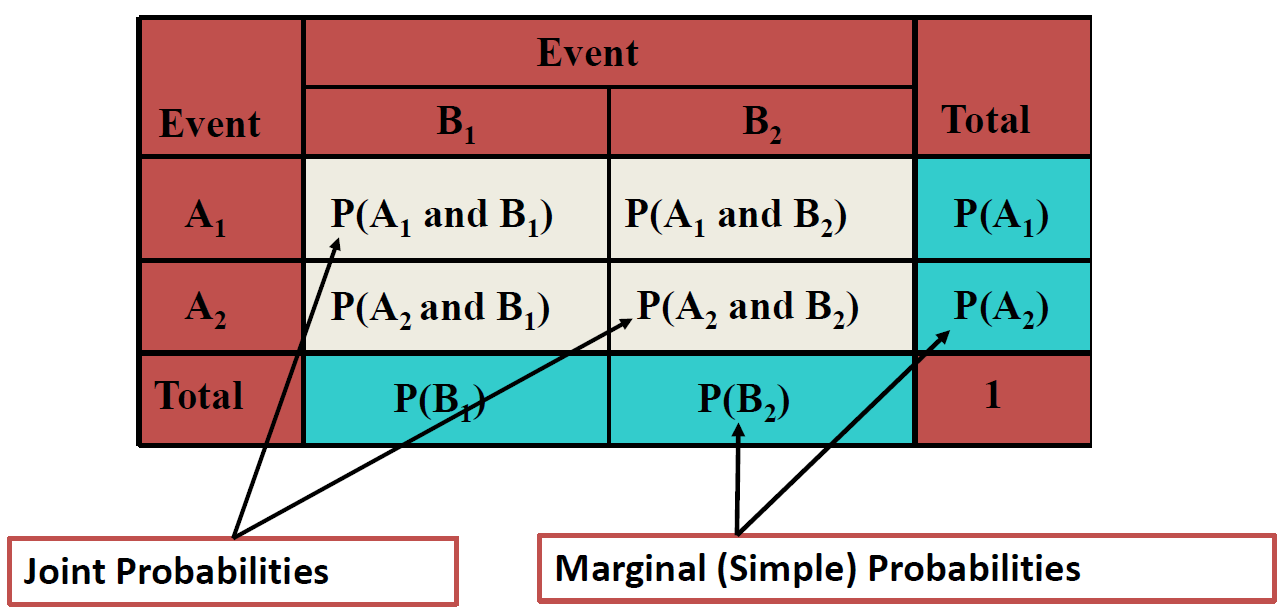

In [13]:
pd.crosstab(df.gender,df.city)
# pd.crosstab(df.city,df.gender).plot()

city,bangalore,chennai,delhi,kolkata,mumbai,pune,thane,trivandrum
gender,,,,,,,,
F,17,20,10,19,19,15,20,14
M,29,16,20,26,22,16,17,20


In [24]:
pd.crosstab(df.gender,df.city,
            margins=True)

city,bangalore,chennai,delhi,kolkata,mumbai,pune,thane,trivandrum,All
gender,,,,,,,,,
F,17,20,10,19,19,15,20,14,134
M,29,16,20,26,22,16,17,20,166
All,46,36,30,45,41,31,37,34,300


In [26]:
pd.crosstab(df.gender,df.city,
            margins=True,
            normalize=True)*100

city,bangalore,chennai,delhi,kolkata,mumbai,pune,thane,trivandrum,All
gender,,,,,,,,,
F,5.666667,6.666667,3.333333,6.333333,6.333333,5.000000,6.666667,4.666667,44.666667
M,9.666667,5.333333,6.666667,8.666667,7.333333,5.333333,5.666667,6.666667,55.333333
All,15.333333,12.000000,10.000000,15.000000,13.666667,10.333333,12.333333,11.333333,100.000000


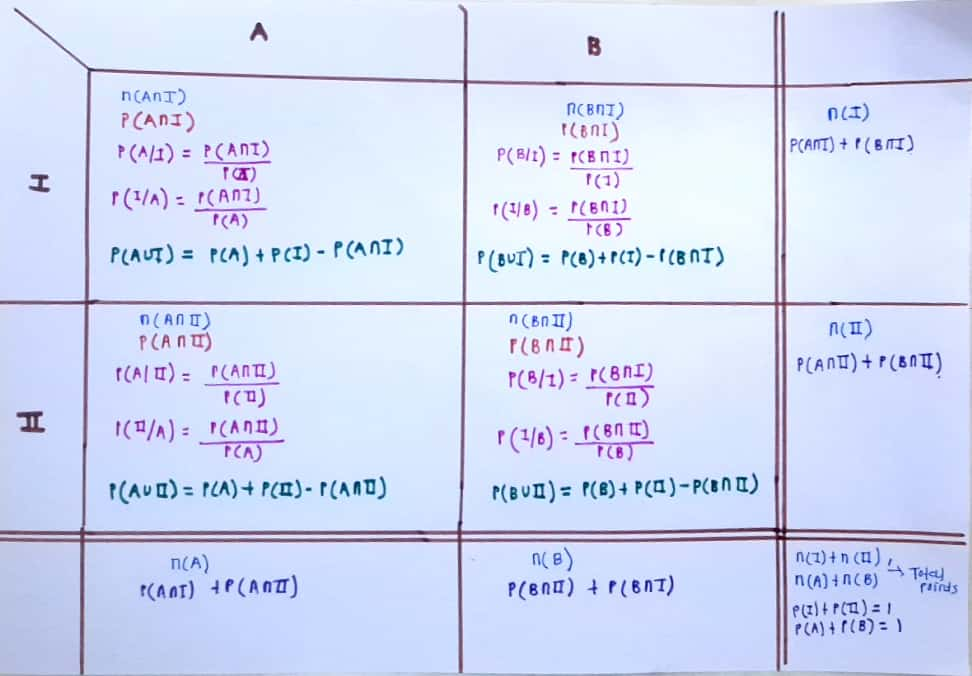

In [27]:
# conditioanl probabilities using crosstab : refer above chart
pd.crosstab(df.gender,df.city,margins=True,normalize='index')*100    # conditional prob of coulmn given index 
pd.crosstab(df.gender,df.city,margins=True,normalize='columns')*100  # conditional prob of index given column
# pd.crosstab(df.city,df.gender).plot()

city,bangalore,chennai,delhi,kolkata,mumbai,pune,thane,trivandrum,All
gender,,,,,,,,,
F,36.956522,55.555556,33.333333,42.222222,46.341463,48.387097,54.054054,41.176471,44.666667
M,63.043478,44.444444,66.666667,57.777778,53.658537,51.612903,45.945946,58.823529,55.333333


```








```

```








```

```








```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 12: dropna() | fillna()</span> </u> </h1>
    Revise the defination of "na_values" from Chapter1
</div>


#### df.dropna(inplace,axis=0,thresh)

In [45]:
df=pd.DataFrame({'A':[1,2,None,None],
                 'B':[5,None,None,None],
                 'C':[1,2,3,None],
                 'D':[5,1,2,None]})
df

,A,B,C,D
0,1.0,5.0,1.0,5.0
1,2.0,NaN,2.0,1.0
2,NaN,NaN,3.0,2.0
3,NaN,NaN,NaN,NaN


Rows

In [13]:
# droping rows containing atlease 1 Null value in a data frame  [thresh=len(df.columns)+1-1]
df.dropna() 
df.dropna(how='any)                   
df.dropna(thresh=len(df.columns),inplace=False)
df[~df.isnull().any(axis=1)]

,A,B,C,D
0,1.0,5.0,1.0,5.0


In [27]:
# droping rows containing atlease Null values in a data frame    [thresh=len(df.columns)+1-2]
df.dropna(thresh=len(df.columns)-1,inplace=False)

,A,B,C,D
0,1.0,5.0,1.0,5.0
1,2.0,NaN,2.0,1.0


In [53]:
# droping rows containing atlease all Null values in a data frame    [thresh=len(df.columns)+1-len(df.columns)]
df.dropna(how='any')
df.dropna(thresh=1,inplace=False)
df[~df.isnull().all(axis=1)]

,A,B,C,D
0,1.0,5.0,1.0,5.0
1,2.0,NaN,2.0,1.0
2,NaN,NaN,3.0,2.0


Columns

In [54]:
df=df.T
df

,0,1,2,3
A,1.0,2.0,NaN,NaN
B,5.0,NaN,NaN,NaN
C,1.0,2.0,3.0,NaN
D,5.0,1.0,2.0,NaN


In [43]:
# droping Columns containing atlease 1 Null values in a data frame  [thresh=len(df.columns)+1-1]
df.dropna(axis=1,how='any')
df.dropna(axis=1,inplace=False) 
df.dropna(axis=1,thresh=len(df),inplace=False)

,0
A,1.0
B,5.0
C,1.0
D,5.0


In [41]:
# droping Columns containing atleast 2 Null values in a data frame    [thresh=len(df.columns)+1-2]
df.dropna(axis=1,thresh=len(df.columns)-1,inplace=False)

,0,1
A,1.0,2.0
B,5.0,NaN
C,1.0,2.0
D,5.0,1.0


In [40]:
# droping Columns containing altleast all Null values in a data frame    [thresh=len(df.columns)+1-len(df.columns)]
 df.dropna(axis=1,how='all')
df.dropna(axis=1,thresh=1,inplace=False)

,0,1,2
A,1.0,2.0,NaN
B,5.0,NaN,NaN
C,1.0,2.0,3.0
D,5.0,1.0,2.0


#### df.column.fillna(inplace)

In [67]:
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


In [68]:
# fill using Direct_Aggrigation
df.compl.fillna(df.compl.mean(),inplace=False)

0       2
1      17
2      18
3      10
4      15
       ..
295    12
296    19
297     7
298     8
299     1
Name: compl, Length: 300, dtype: int64

In [69]:
# fuill using Groupby_aggrigation
df.compl.fillna(df.groupby('city').compl.transform('mean'),inplace=False)

0       2
1      17
2      18
3      10
4      15
       ..
295    12
296    19
297     7
298     8
299     1
Name: compl, Length: 300, dtype: int64

In [70]:
df.fillna(value={'Name': 'swapnil', 'Gender': 'unknown', 'city': 'Wardha'} )

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18
3,4,ypkSHmR,55,ypkSHmR@mail.com,M,trivandrum,WEND250,3177,9.8,63,10
4,5,dVoUqbp,18,dVoUqbp@hotmail.com,F,thane,SPL50,2339,9.4,22,15
...,...,...,...,...,...,...,...,...,...,...,...
295,296,GzuseOS,27,GzuseOS@mycompany.in,M,trivandrum,WEND250,2650,4.3,78,12
296,297,xmePOnb,63,xmePOnb@crs.co.in,F,mumbai,WKD500,930,7.8,57,19
297,298,fiqoPJL,34,fiqoPJL@mail.com,M,mumbai,SPL50,2776,1.8,88,7
298,299,SqkjGDA,48,SqkjGDA@yahoo.co.in,M,trivandrum,SZ255,186,3.0,52,8


#### Interpolation

In [116]:
df.compl.interpolate(method='linear')

0       2
1      17
2      18
3      10
4      15
5      11
6      10
7      10
8      10
9       3
10     19
11      4
12     19
13     10
14     15
15      4
16      3
17      8
18     18
19     11
20      3
21      0
22      1
23      9
24      8
25     15
26      0
27      7
28      7
29      7
30     10
31     15
32      7
33      7
34      3
35      2
36      9
37      1
38      2
39      4
40     19
41      7
42      6
43      0
44     18
45     18
46     14
47     10
48     15
49     11
50      3
51     18
52      9
53     13
54     13
55      3
56      8
57      6
58     16
59      2
60     14
61     19
62     17
63     11
64     17
65     10
66      3
67      4
68      5
69     18
70     10
71      6
72     16
73      1
74      4
75     19
76      8
77     13
78      0
79     15
80      3
81      7
82     11
83      6
84     11
85      1
86     16
87      2
88     10
89     15
90     16
91      5
92     15
93     13
94     13
95     14
96      4
97     12
98     15
99      8


```






```

```






```

```






```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 13: Concatinating & Merging</span> </u> </h1>
</div>


In [171]:
df1 = pd.DataFrame({'A': [1, 2, 3], 
                    'B': [4, 5, 6]})
df2 = pd.DataFrame({'B': [10, 11, 12],
                    'C':[13,14,15]},
                   index=[1,2,'c'])
display(df1)
display(df2)

,A,B
0,1,4
1,2,5
2,3,6


,B,C
1,10,13
2,11,14
c,12,15


<div style="text-align: center;">
    <h2> Concatinate</u> </h2>
</div>

In [146]:
# Concatinate Vertically
pd.concat([df1, df2], join='inner' ,ignore_index=True)
pd.concat([df1, df2], ignore_index=False)

,A,B,C
0,1.0,4,NaN
1,2.0,5,NaN
2,3.0,6,NaN
1,NaN,10,13.0
2,NaN,11,14.0
c,NaN,12,15.0


In [147]:
# Concatinate Horizontally : (Sql join on index)
pd.concat([df1, df2], axis=1,join='inner', ignore_index=True)    # sql inner join on index
pd.concat([df1, df2], axis=1, ignore_index=False)                # sql outer join on index

,A,B,B,C
0,1.0,4.0,NaN,NaN
1,2.0,5.0,10.0,13.0
2,3.0,6.0,11.0,14.0
c,NaN,NaN,12.0,15.0


In [180]:
# ★★★★☆
# most of the time you will encounter this case in industries , appending similar dataframes with same columns names
df1 = pd.DataFrame({'Name': ['John', 'Alice', 'Bob'],
                   'Age': [28, 25, 32]})

df2 = pd.DataFrame({'Name': ['Emma', 'Mike'],
                   'Age': ['30', 29]})

display(df1,df2)
lst_df = [df1,df2]
# Append new_df to df
pd.concat(lst_df, ignore_index=True)
# Note :  for the above operation we can use .append() operation which is deprecated in the latest version of pandas

,Name,Age
0,John,28
1,Alice,25
2,Bob,32


,Name,Age
0,Emma,30
1,Mike,29


,Name,Age
0,John,28
1,Alice,25
2,Bob,32
3,Emma,30
4,Mike,29


```


































```

<div style="text-align: center;">
    <h2> Merging (JOIN in SQL)</u> </h2>
</div>

```
After "groupby" , "merge" is the most important and crucial operation you will use in pandas ,
Its very important to be aware precautions need to take while merging
1. Merging Columns Must have SAME DATATYPE (it is okay to convert all dataframe into catagory or string first)
2. It is Ideal to use to (suffix / prefix) while merging the dataframes to Identifiy perticular attribute is from left
   table or right table
3. Decide dependeing upon the use cases whether to reset_index or nor after merging

Article
```

In [61]:
# lets we have 2 dataframes
df1 = pd.DataFrame({'IDx': [1, 2, 3], 
                    'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'IDy': [2, 3, 4], 
                    'Age': [25, 30, 22]})
display(df1)
display(df2)

,IDx,Name
0,1,Alice
1,2,Bob
2,3,Charlie


,IDy,Age
0,2,25
1,3,30
2,4,22


In [52]:
# Merging based on the 'ID' column (inner join by default)
df1.merge(df2,
          left_on='IDx', 
          right_on='IDy')

,IDx,Name,IDy,Age
0,2,Bob,2,25
1,3,Charlie,3,30


In [53]:
df1.merge(df2, 
          left_on='IDx', 
          right_on='IDy', 
          how='left')

,IDx,Name,IDy,Age
0,1,Alice,NaN,NaN
1,2,Bob,2.0,25.0
2,3,Charlie,3.0,30.0


In [54]:
df1.merge(df2,
          left_on='IDx', 
          right_on='IDy', 
          how='right')

,IDx,Name,IDy,Age
0,2.0,Bob,2,25
1,3.0,Charlie,3,30
2,NaN,NaN,4,22


In [55]:
# Outer join
df1.merge(df2, 
          left_on='IDx', 
          right_on='IDy', 
          how='outer')

,IDx,Name,IDy,Age
0,1.0,Alice,NaN,NaN
1,2.0,Bob,2.0,25.0
2,3.0,Charlie,3.0,30.0
3,NaN,NaN,4.0,22.0


#### Witty Tip ☺
```
In devlopement environment , you will often required to perform merging operation ,
however this become repetative task to and time consuming as precautions while merging dataframes need to cosider everytime
it is suggested to write a fuction to do merging to use it in abstract way
i have written some tips for faster merging of the dataframe encoperated in the function writen below

1. Datatype of the merging columns shoud be same, convert it into lightes datatype in pandas for faster conversion (catagory)
2. Set as index to merging column , this fasten merging operation
3. Add suffixes to dataframes to better clearity after merging
4. Prefer to user df1.merge(df2) over pd.merge() as it is relatively slower
5. Use idicatory while merging dataframe for better clearity
```

In [13]:
# dataframe is passed to the function as call by refference Hence Any changes to dataframe inside function will reflect 
# on original dataframe, it is ideal to create a copy of dataframe insided a function to make sure there is no 
# change in passed dataframe 

dum_df = pd.DataFrame({'IDx':[1,2,3], 
                       'Name':['Alice','Bob','Charlie']}) 

def fun_test(df): 
    df['new_col'] = 3 
    return df 

df_return = fun_test(dum_df) 
display(df_return) 
display(dum_df) 

# -------------------------------------------------------------------- #

dum_df = pd.DataFrame({'IDx':[1,2,3], 
                       'Name':['Alice','Bob','Charlie']}) 

def fun_test(df): 
    df = df.copy() 
    df['new_col'] = 3 
    return df 

df_return = fun_test(dum_df) 
display(df_return) 
display(dum_df) 

,IDx,Name,new_col
0,1,Alice,3
1,2,Bob,3
2,3,Charlie,3


,IDx,Name,new_col
0,1,Alice,3
1,2,Bob,3
2,3,Charlie,3


In [3]:
def join(df_left,df_right,merging_keys_tuple,suffix_tuple = ('_left','_right'),how_merge = 'outer'): 
    ''' 
    Make sure explicite index of both the dataframe df_left & df_right must be implicite 
    i.e explicite index of both dataframe should not be intigral part of dataframe data 
    cuase eventually its going to be dropped in this function 
    ''' 
    
    # Data Frame passed as call by reference in function , any changes will reflect in original dataset
    # Hence need to create a copy first to avoid changes in original dataset
    df1 = df_left.copy() 
    df2 = df_right.copy() 
    
    # Convet dataframe into lightes datatype possible (catagory) 
    df1 = df1.astype('category') 
    df2 = df2.astype('category') 
    
    # Set merging column as index to dataframe for faster execution 
    df1.set_index(merging_keys_tuple[0], inplace=True) 
    df2.set_index(merging_keys_tuple[1], inplace=True) 
    
    # Add suffixes to dataframes to identify dataframes after merging 
    df1 = df1.add_suffix(suffix_tuple[0]) 
    df2 = df2.add_suffix(suffix_tuple[1]) 
    
    # prefer df1.merge(df2) over pd.merge as it is relatively slower 
    merged_df = df1.merge(df2, 
                          left_index = True, 
                          right_index = True, 
                          how = how_merge, 
                          indicator = True) 
    
    merged_df.index.names = merging_keys_tuple[2] 
    merged_df.reset_index(inplace=True) 
    display(merged_df._merge.value_counts()) 
    
    return merged_df

In [7]:
# Lets say we have data Frames
df1 = pd.DataFrame({'IDx': [1, 2, 3], 
                    'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'IDy': [2, 3, 4], 
                    'Age': [25, 30, 22]})
display(df1)
display(df2)

,IDx,Name
0,1,Alice
1,2,Bob
2,3,Charlie


,IDy,Age
0,2,25
1,3,30
2,4,22


In [10]:
df_merge = join(df1,df2,                    # <-- Data Frames
                (['IDx'],['IDy'],['ID']),   # <--- You can merge on multiple columns as well, provide list accordingly
                ('_left','_right'),         # <-- Suffixes want to add
                'outer')                    # <--- Type of join want to perform

df_merge.head()

both          2
left_only     1
right_only    1
Name: _merge, dtype: int64

,ID,Name_left,Age_right,_merge
0,1,Alice,NaN,left_only
1,2,Bob,25,both
2,3,Charlie,30,both
3,4,NaN,22,right_only


In [103]:
# Note :
df_merge                                        # outer join
df_merge[df_merge._merge == 'both']             # inner join
df_merge[ ~(df_merge._merge == 'right_only') ]  # left join
df_merge[ ~(df_merge._merge == 'left_only')]    # right join

,ID,Name_left,Age_right,_merge
1,2,Bob,25.0,both
2,3,Charlie,30.0,both
3,4,NaN,22.0,right_only


<div style="text-align: center;">
        <h1><span style='color:blue'>Chapeter 14: Datetime in Python</span> </u> </h1>
</div>


In [1]:
from datetime import date,time,datetime,timedelta

In [16]:
# datetime object
datetime.now()                                          # datetime.datetime(2024, 7, 30, 23, 4, 17, 530144)
datetime(2024,4,24)                                     # datetime.datetime(2024, 4, 24, 0, 0)
datetime(2024,4,24,12,58,37,56).replace(year=2025,      # datetime.datetime(2025, 6, 9, 1, 23, 1, 1)
                                        month=6,
                                        day=9,
                                        hour=1,
                                        minute=23,
                                        second=1,
                                        microsecond=1)  
datetime.strptime('24/04/2024','%d/%m/%Y')              # datetime.datetime(2024, 4, 24, 0, 0)

# Methods
datetime.now().date()  # datetime.date(2024, 7, 30)
datetime.now().time()  # datetime.time(23, 5, 6, 588623)

# Attributes
datetime.now().year    # 2024
datetime.now().month   # 7
datetime.now().day     # 30
datetime.now().hour    # 23
datetime.now().minute  # 7
datetime.now().second  # 22


# timedifference object
timedelta(4)          # datetime.timedelta(days=4)   Default days  
timedelta(weeks = 1,  # datetime.timedelta(days=8, seconds=3661)
          days=1,
          hours=1,
          minutes=1,
          seconds=1)


# Addiation and subtraction of timestaps
datetime.now() - timedelta(4)    # datetime.datetime(2024, 7, 26, 23, 9, 0, 536545)

34

In [ ]:
### ----------------------- Extraction using strftime : returns string-------------------------------------------------# 
datetime.now().strftime("%D")                         # 04/24/24
datetime.now().strftime("%Y %y")                      # 2024 24
datetime.now().strftime("%m %B %b %h")                # 04 April Apr Apr
datetime.now().strftime("%d")                         # 24
               
datetime.now().strftime("%A %a %w")                   # Wednesday Wed 3
datetime.now().strftime("%j")                         # 115
datetime.now().strftime("%W")                         # 17
     
datetime.now().strftime("%T | % r| %R")               # 17:26:07  | 05:26:07 PM | 17:26
datetime.now().strftime("%H:%M:%S  | %I:%M:%S %p")    # 17:22:50  | 05:22:50 PM

datetime.now().strftime("%U %u")                      # 16 3

```



















```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 15: Datetime in Pandas</span> </u> </h1>
</div>


In [89]:
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\weatherHistory.csv")
df=df[['Formatted Date']].sample(5).reset_index(drop=True)
df.rename(columns={'Formatted Date':'date'},inplace=True)
df

,date
0,2006-12-27 19:00:00.000 +0100
1,2016-06-25 01:00:00.000 +0200
2,2015-05-11 00:00:00.000 +0200
3,2012-09-27 10:00:00.000 +0200
4,2013-04-09 17:00:00.000 +0200


In [91]:
df['datetime_column'] = pd.to_datetime(df.date.str.split('+').apply(lambda x:x[0]), format='%Y-%m-%d %H:%M:%S.%f')
df.drop(columns=df.columns[[0]], inplace=True)
df

,datetime_column
0,2006-12-27 19:00:00
1,2016-06-25 01:00:00
2,2015-05-11 00:00:00
3,2012-09-27 10:00:00
4,2013-04-09 17:00:00


In [92]:
print(df.dtypes)

datetime_column    datetime64[ns]
dtype: object


In [93]:
df.datetime_column.dt.date
df.datetime_column.dt.time

0    19:00:00
1    01:00:00
2    00:00:00
3    10:00:00
4    17:00:00
Name: datetime_column, dtype: object

In [154]:
df['Date'] = pd.to_datetime(df.datetime_column.dt.date, format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df.datetime_column.dt.time, format='%H:%M:%S')
df

,datetime_column,Date,Time
94633,2016-11-23 05:00:00,2016-11-23,1900-01-01 05:00:00
28516,2009-12-09 04:00:00,2009-12-09,1900-01-01 04:00:00
84040,2015-03-10 19:00:00,2015-03-10,1900-01-01 19:00:00
88512,2016-08-14 03:00:00,2016-08-14,1900-01-01 03:00:00
10000,2007-08-28 16:00:00,2007-08-28,1900-01-01 16:00:00


In [155]:
# Date
df['year']=df.Date.dt.year
df['quarter']=df.Date.dt.quarter
df['semester']=df.quarter.apply(lambda x: 1 if x in [1,2] else 2)
df['month']=df.Date.dt.month 
df['month_name']=df.Date.dt.month_name()
df['week']=df.Date.dt.week
df['day']=df.Date.dt.day
df['day_name']=df.Date.dt.day_name()
df['dayofweek']=df.Date.dt.dayofweek
df['weekend']=df.day_name.apply(lambda x: 0 if x=='Sunday' or x=='Saturday' else 1)

# Time
df['hour']=df.Time.dt.hour
df['minute']=df.Time.dt.minute
df['second']=df.Time.dt.second
df.head()

C:\Users\swapn\AppData\Local\Temp\ipykernel_5820\3145284470.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df.Date.dt.week


,datetime_column,Date,Time,year,quarter,semester,month,month_name,week,day,day_name,dayofweek,weekend,hour,minute,second
94633,2016-11-23 05:00:00,2016-11-23,1900-01-01 05:00:00,2016,4,2,11,November,47,23,Wednesday,2,1,5,0,0
28516,2009-12-09 04:00:00,2009-12-09,1900-01-01 04:00:00,2009,4,2,12,December,50,9,Wednesday,2,1,4,0,0
84040,2015-03-10 19:00:00,2015-03-10,1900-01-01 19:00:00,2015,1,1,3,March,11,10,Tuesday,1,1,19,0,0
88512,2016-08-14 03:00:00,2016-08-14,1900-01-01 03:00:00,2016,3,2,8,August,32,14,Sunday,6,0,3,0,0
10000,2007-08-28 16:00:00,2007-08-28,1900-01-01 16:00:00,2007,3,2,8,August,35,28,Tuesday,1,1,16,0,0


In [156]:
# Diffence between points
diff=df.datetime_column.iloc[0]-df.datetime_column.iloc[1]
df.Date.iloc[0]-df.Date.iloc[1]
df.Time.iloc[0]-df.Time.iloc[1]

Timedelta('0 days 01:00:00')

In [157]:
import datetime
today=datetime.datetime.today()
print(today)

2023-08-30 01:09:02.677316


In [158]:
# Diffence between Date Columns
diff=today-df.datetime_column
diff
diff.dt.days                 # Day diff
diff/np.timedelta64(1,'Y')   # Months diff
diff/np.timedelta64(1,'M')   # Months diff
diff/np.timedelta64(1,'W')   # Months diff
diff/np.timedelta64(1,'s')   # Months diff
diff/np.timedelta64(1,'m')   # Months diff
diff/np.timedelta64(1,'h')   # Months diff

94633     59300.150744
28516    120285.150744
84040     74262.150744
88512     61726.150744
10000    140289.150744
Name: datetime_column, dtype: float64

In [159]:
df.datetime_column.min()
df.datetime_column.max()
span=df.datetime_column.max()-df.datetime_column.min()
span

Timedelta('3374 days 13:00:00')

In [160]:
df.set_index('datetime_column',inplace=True)
df.head(2)

,Date,Time,year,quarter,semester,month,month_name,week,day,day_name,dayofweek,weekend,hour,minute,second
datetime_column,,,,,,,,,,,,,,,
2016-11-23 05:00:00,2016-11-23,1900-01-01 05:00:00,2016,4,2,11,November,47,23,Wednesday,2,1,5,0,0
2009-12-09 04:00:00,2009-12-09,1900-01-01 04:00:00,2009,4,2,12,December,50,9,Wednesday,2,1,4,0,0


In [164]:
df['2006']                # df.loc['2006']
df['2006-01':'2015-08']   # df.loc['2006-01':'2015-08']

,Date,Time,year,quarter,semester,month,month_name,week,day,day_name,dayofweek,weekend,hour,minute,second
datetime_column,,,,,,,,,,,,,,,
2009-12-09 04:00:00,2009-12-09,1900-01-01 04:00:00,2009,4,2,12,December,50,9,Wednesday,2,1,4,0,0
2015-03-10 19:00:00,2015-03-10,1900-01-01 19:00:00,2015,1,1,3,March,11,10,Tuesday,1,1,19,0,0
2007-08-28 16:00:00,2007-08-28,1900-01-01 16:00:00,2007,3,2,8,August,35,28,Tuesday,1,1,16,0,0


In [162]:
df.month.resample('Y').max()

datetime_column
2007-12-31     8.0
2008-12-31     NaN
2009-12-31    12.0
2010-12-31     NaN
2011-12-31     NaN
2012-12-31     NaN
2013-12-31     NaN
2014-12-31     NaN
2015-12-31     3.0
2016-12-31    11.0
Freq: A-DEC, Name: month, dtype: float64

```





```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 16: Saving  a Dataframe to a file</span> </u> </h1>
</div>


```
to_clipboard()  # copy data to clipboard and paste using Ctrl + V
to_csv()
to_excel()
to_dict()       # Converting dataframe into dict
to_feather()
to_parquet()
to_string()
to_html()
to_json()
to_pickle()     # Serialization
```

In [138]:
df.to_clipboard()   # Copy dataframe to keybaord /  you can directly paste into excel sheet for analysis !
df.to_csv('path',index=False)
df.to_json('path',index=False)
df.to_excel('path',sheet_name='abc',index=False)

ValueError: 'index=False' is only valid when 'orient' is 'split' or 'table'

```




```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 17: Data Visualisation with Pandas
        </span> </u> </h1>
</div>


```
I have included a few examples of using pandas' built-in data visualization techniques. Most of them are just for a quick view or analysis which i usualy use; however, I do not recommend using pandas for data visualization. For that, we have well-established, dedicated libraries. That said, I will still include these methods in the Data Visualization section.
```

In [44]:
# lets say we have a dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")
df.head(3)

,custid,name,age,email,gender,city,plan,talktime,netuse,cust_since,compl
0,1,ZkYesFK,38,ZkYesFK@imarticus.com,F,chennai,SZ255,2591,5.5,28,2
1,2,WlFqRhG,21,WlFqRhG@gmail.com,F,kolkata,WKD500,3448,3.7,30,17
2,3,lawpOJQ,19,lawpOJQ@infostats.in,F,chennai,SPL50,580,2.1,100,18


<Axes: ylabel='Frequency'>

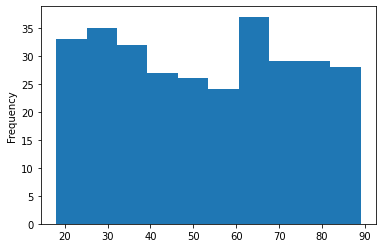

In [41]:
# histogram
df.age.plot(kind= 'hist')

<Axes: >

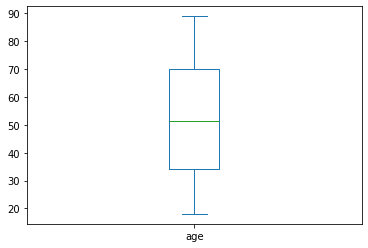

In [39]:
# boxplot
df.age.plot(kind='box')

<Axes: xlabel='age', ylabel='compl'>

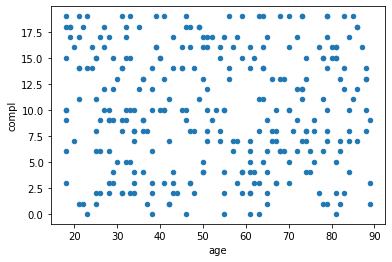

In [43]:
# scatterplot
df.plot.scatter(x='age', 
                y='compl')

<Axes: >

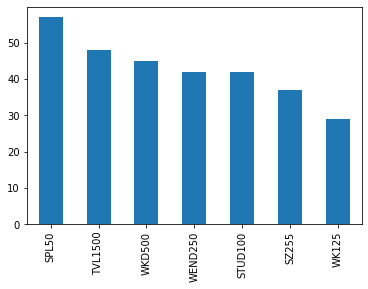

In [49]:
# countplot
df.plan.value_counts().plot(kind='bar')

```






















































```

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 18: Misllenious
        </span> </u> </h1>
</div>


Pandas display options

In [61]:
# Set up Display Options in pandas provide
pd.set_option('display.max_rows',5,              # No of rows to Display
              'display.max_columns',None,        # No of Columns to Display
              'display.precision', 8,
              'display.show_dimensions',True,
              'display.max_colwidth',None)       # Precision of Numeric Data in dataframe

In [92]:
# Reset any display option to default value
pd.reset_option("display.max_rows")

Data Precision representation

In [25]:
# Lets say you have following dataframe df
df = pd.DataFrame(np.random.rand(10).reshape(5,-1)*10,
                  columns = 'A B'.split())
display(df)


# Format specific columns with different precision
df_styled = df.style.format({'A': '{:.1f}', 
                             'B': '{:.3f}'})
display(df_styled)

# Note: df_styled is not a dataframe object its Styler object now, you cant perform any dataframe operation on it
#       its purpose is to present data in required format, after all the processing of the dataframe
type(df)           # pandas.core.frame.DataFrame
type(df_styled)    # pandas.io.formats.style.Styler

,A,B
0,4.718559,7.944311
1,4.761249,1.619101
2,9.410965,9.960927
3,1.724520,4.479883
4,3.617934,2.813368


,A,B
0,4.7,7.944
1,4.8,1.619
2,9.4,9.961
3,1.7,4.480
4,3.6,2.813


Pandas Profiling \
★★★★☆

In [6]:
from pandas_profiling import ProfileReport
# lets say we have a dataframe
df=pd.read_csv(r"E:\Dropbox\Study\Python Notes\Main Notes\Datasets\telecomCust2021.csv")

# use pandas Profiler to generate html file
profile = ProfileReport(df)

# save html file and open
profile.to_file(r"C:\Users\swapn\OneDrive\Desktop\pandashtml")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

```






````

<div style="text-align: center;">
    <h1><span style='color:blue'>Chapeter 19: Good Articals to Read & Advance topic to explore in Panas
        </span> </u> </h1>
</div>


```
Guys there are lots of concepts and are not yet covered, it will overwhemling if we are going to try to get 
everything in one go.we will be covering them in part 2, Advance Pandas. However i can assure you that
If you are at 17 Chapter, grasping atlest 80% of the concepts in pdf
Congratulations you are in the top 1% in pandas (atlest you could assume at your end!)
```

```
                                  CONCEPTS TO EXPLORE as HOMEWORK

A. Iterating over dataframe
1. iteritems() − to iterate over the (key,value) pairs
2. iterrows() − iterate over the rows as (index,series) pairs
3. itertuples() − iterate over the rows as namedtuples

B. Explore "ix" along with "loc" & "iloc"

C.Window Function
.rolling()
.expanding()
.ewm()

D
.tz_localize()
.tz_convert()
.resample()


E
pd.cut vs pd.qcut

                                      GOOD ARTICALS TO READ

https://www.kdnuggets.com/how-to-merge-large-dataframes-efficiently-with-pandas
https://www.kdnuggets.com/building-data-science-pipelines-using-pandas
```